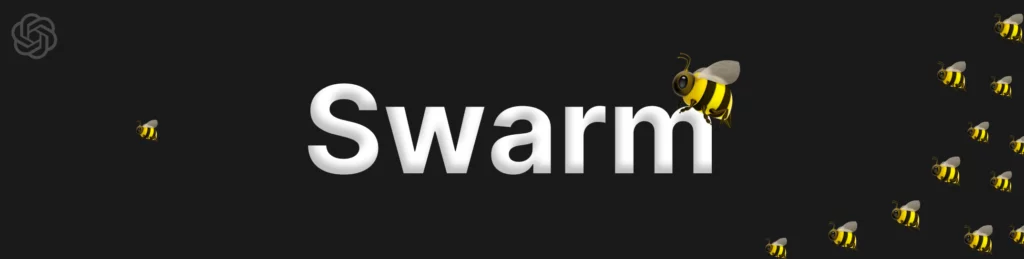

## **What is Swarm AI**?
Swarm agents are intelligent, autonomous units that work collaboratively to solve multifaceted tasks. Each `agent` is designed with a `specific role`, such as `retrieving information, analyzing data, or generating actionable outputs`. By mimicking swarm intelligence seen in nature, such as how ants or bees operate, these `agents communicate and adapt dynamically to achieve a common goal`. This collaborative approach ensures efficiency, scalability, and robustness in handling complex problem domains.
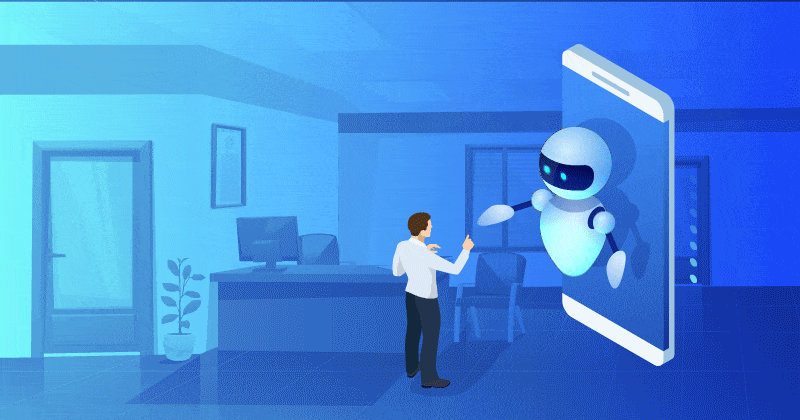


## Project Description
This project is a `Streamlit-based AI Coding Assistant` built on the principles of swarm intelligence. It leverages multiple AI agents to deliver a seamless experience for users` seeking coding solutions`. The workflow involves three specialized agents:` a search agent` for finding relevant coding solutions online, an `analysis agent` for synthesizing and summarizing retrieved data, and a `code-writing agent` to produce clean, well-documented code examples based on user queries. This assistant is designed to assist developers, students, and technical professionals by saving time, reducing cognitive load, and ensuring clarity and precision in code-related tasks. By combining advanced AI and user-friendly design, it provides a robust tool for tackling coding challenges.

# **Streamlit Swarm AI Coding Assistant**

## 1. Install Required Packages
To begin, we need to install the necessary packages for our project. This includes libraries for AI interaction, web searching, and creating a web application.


In [ ]:
!pip install httpx==0.23.0

In [ ]:
!pip install git+https://github.com/openai/swarm.git -q
!pip install streamlit
!pip install -U duckduckgo_search
!pip install kaggle
!pip install pyngrok

In [ ]:
!npm install localtunnel


## 2. Create the Streamlit Application
Next, we will write the main application code for our Streamlit app. This code will handle user queries, search for coding solutions, analyze the results, and generate a well-documented code solution.

### 2.1 Application Code

In [ ]:
# Write your Streamlit script
%%writefile app.py
from swarm import Swarm, Agent
from duckduckgo_search import DDGS
from datetime import datetime
import os
import streamlit as st

# Set your OpenAI API Key here directly or through environment variables
os.environ['OPENAI_API_KEY'] = "Replace with your API Key"

# Initialize the Swarm client
client = Swarm()
ddgs = DDGS()
MODEL = "gpt-4o"

# Web Search for coding-related queries
def search_coding_solutions(query):
    print(f"Searching for coding solutions: {query}...")
    current_date = datetime.now().strftime("%Y-%m")
    results = ddgs.text(f"{query} {current_date} coding solution", max_results=5)
    if results:
        solutions = ""
        for result in results:
            solutions += f"Title: {result['title']}\nURL: {result['href']}\nSnippet: {result['body']}\n\n"
        return solutions.strip()
    return f"No coding solutions found for {query}."

# Agent 1: Search Agent
search_agent = Agent(
    name="Coding Search Agent",
    instructions="Fetch coding examples, solutions, or documentation related to the user's query.",
    functions=[search_coding_solutions],
    model=MODEL
)
# Agent 2: Code Analysis Agent
analysis_agent = Agent(
    name="Code Analysis Agent",
    instructions="""Analyze and clean the raw search results for coding solutions:
    1. Extract relevant code snippets and explanations.
    2. Remove duplicates and inconsistent information.
    3. Summarize solutions and provide a concise description.
    4. Ensure clarity and readability of the information.""",
    model=MODEL
)

# Agent 3: Code Writer Agent
code_writer_agent = Agent(
    name="Code Writer Agent",
    instructions="""Write a clean, well-documented code solution based on the analyzed results:
    1. Provide a working code example.
    2. Include comments and explanations for clarity.
    3. Organize code logically.
    4. Ensure the solution is concise and accurate.""",
    model=MODEL
)


# Workflow Function
def run_workflow(query):
    st.write("**Running Workflow...**")

    # Step 1: Search the web
    search_response = client.run(
        agent=search_agent,
        messages=[{"role": "user", "content": query}]
    )
    raw_results = search_response.messages[-1]["content"]

    # Step 2: Analyze results
    analysis_response = client.run(
        agent=analysis_agent,
        messages=[{"role": "user", "content": raw_results}]
    )
    analyzed_results = analysis_response.messages[-1]["content"]

    # Step 3: Write organized solution
    final_response = client.run(
        agent=code_writer_agent,
        messages=[{"role": "user", "content": analyzed_results}],
        stream=True
    )

    return final_response

# Streamlit App
def main():
    st.set_page_config(page_title="Swarm AI Coding Assistant", page_icon="💻")
    st.title("Swarm AI Coding Assistant 🧠💻")
    st.write("Ask your technical questions, and let AI search, analyze, and write solutions for you!")

    # User Input
    query = st.text_input("Enter your query (e.g., 'How to implement Merge Sort in Python?')", "")

    # Generate Results
    if st.button("Generate Solution") and query:
        st.write("### Query: ", query)
        with st.spinner("Fetching, analyzing, and writing results..."):
            response_stream = run_workflow(query)
            response_placeholder = st.empty()
            solution = ""

            for chunk in response_stream:
                if isinstance(chunk, dict) and "content" in chunk:
                    content = chunk.get("content", "")
                    if content:  # Ensure content is not None or empty
                        solution += content
                        response_placeholder.markdown(solution + "▌")

            response_placeholder.markdown(solution)
            st.success("Solution generated successfully!")



    # Footer
    st.markdown("---")
    st.markdown("Built with ❤️ using **Streamlit** and **Swarm AI**")

if __name__ == "__main__":
    main()

Writing app.py



## 3. Set Up Ngrok for Streamlit
To expose our Streamlit app to the internet, we will use Ngrok. This allows us to share our app easily.

### 3.1 Ngrok Authentication

In [ ]:
ngrok.set_auth_token("<YOUR_NGROK_AUTH_TOKEN>")


### 3.2 Start Ngrok Tunnel

In [ ]:
from pyngrok import ngrok

# Set up ngrok tunnel for Streamlit
public_url = ngrok.connect(addr='8501')
print(f"Access your Streamlit app at {public_url}")

Access your Streamlit app at NgrokTunnel: "https://180e-34-141-131-202.ngrok-free.app" -> "http://localhost:8501"



### 3.3 Start Streamlit Application

In [ ]:
from pyngrok import ngrok

# Start Streamlit
!streamlit run app.py &
public_url = ngrok.connect(port="8501")
print(f"Streamlit App URL: {public_url}")



## Conclusion
You have now set up a Streamlit application that utilizes AI to search for coding solutions, analyze them, and generate well-documented code. You can access your application using the URL provided by Ngrok.
For eg.,

```
# Access your Streamlit app at NgrokTunnel: "https://180e-34-141-131-202.ngrok-free.app" -> "http://localhost:8501"
```



## Link to The Notepad for Stable Diffusion
[Notepad with Reference Links](https://drive.google.com/file/d/1mN0YxBmcLzrqty_uenJlebFJIipGJT1c/view?usp=sharing)